# Delta Radiomics

In [99]:
import pandas as pd
import numpy as np

In [100]:
import os
import pandas as pd

def calculate_delta_radiomics(data_folder_path):
    """
    Reads radiomics data from subfolders (Time A and Time B), filters for 'suv2.5' 
    segmentation, calculates the delta (B - A) for numeric features, and stores
    the results in a dictionary per patient.

    Args:
        data_folder_path (str): The path to the main folder containing patient subfolders.

    Returns:
        dict: A dictionary where keys are patient folder names (Patient IDs) 
              and values are dictionaries containing the calculated delta radiomics features.
    """
    all_delta_radiomics = {}
    A_radiomics, B_radiomics = {}, {}

    # 1. Iterate through all items in the main data folder
    for patient_folder_name in os.listdir(data_folder_path):
        patient_path = os.path.join(data_folder_path, patient_folder_name)
        
        # Ensure it is actually a directory (a patient folder)
        if os.path.isdir(patient_path):
            print(f"--- Processing {patient_folder_name} ---")
            
            # Initialize paths for Time A and Time B files
            file_A_path = None
            file_B_path = None
            
            # 2. Find the radiomics files for Time A and Time B in the patient folder
            for filename in os.listdir(patient_path):
                path_excel = os.path.join(patient_path, filename)
                # NOTE: Assuming the files are named consistently and contain 'A' or 'B' 
                # to identify the time point. Adjust this logic if needed.
  
                if '_A' in path_excel.upper() and path_excel.endswith('.xlsx'):
                        file_A_path = path_excel
                elif '_B' in path_excel.upper() and path_excel.endswith('.xlsx'):
                        file_B_path = path_excel
            if file_A_path and file_B_path:
                try:
                    # 3. Read and preprocess the data
                    
                    # Read Excel files and transpose them (assuming features are in columns 
                    # and metadata/values in rows; pandas reads the first row as header)
                    # We assume 'segmentation' is one of the columns after reading.
                    df_A = pd.read_excel(file_A_path)
                    df_B = pd.read_excel(file_B_path)
                    
                    # 4. Filter for the 'suv2.5' segmentation row
                    # NOTE: the column containing 'suv2.5' is named 'Segmentation'
                    # and the feature names are in the other columns.
                    # filtering the columns fro 23 onwards to get only feature values
                    row_A = df_A[df_A['Segmentation'].str.contains('suv2.5')].iloc[0, 23:]
                    row_B = df_B[df_B['Segmentation'].str.contains('suv2.5')].iloc[0, 23:]

                    # Create a Series of only the numeric feature values for A and B
                    
                    # Convert to numeric, coercing errors to NaN (just in case)
                    numeric_A = pd.to_numeric(row_A, errors='coerce')
                    numeric_B = pd.to_numeric(row_B, errors='coerce')

                    # 6. Calculate Delta Radiomics (Time B - Time A)
                    delta_radiomics = numeric_B - numeric_A
                    
                    
                    # Convert the resulting pandas Series into a standard Python dictionary
                    # and store it under the patient's ID
                    # dropna() to remove any features that resulted in NaN
                    all_delta_radiomics[patient_folder_name] = delta_radiomics.dropna().to_dict()
                    A_radiomics[patient_folder_name] = numeric_A.dropna().to_dict()
                    B_radiomics[patient_folder_name] = numeric_B.dropna().to_dict()
                    print(f"Successfully calculated radiomics and delta radiomics for {patient_folder_name}.")

                except Exception as e:
                    print(f"Error processing files for {patient_folder_name}: {e}")
            else:
                print(f"Could not find both A and B files in {patient_folder_name}.")
    A = pd.DataFrame.from_dict(A_radiomics, orient='index')
    B = pd.DataFrame.from_dict(B_radiomics, orient='index')
    all_delta_radiomics = pd.DataFrame.from_dict(all_delta_radiomics, orient='index')

    return all_delta_radiomics, A, B


In [101]:
# Define the path to your main data folder
DATA_DIR = 'D:\RadiomicsProject\modelling\modelling_data' 

# Run the function
delta_radiomics_results, a_radiomics, b_radiomics = calculate_delta_radiomics(DATA_DIR)

# Print the results for verification
print("\n--- Final Results Summary ---")
for patient, delta_data in delta_radiomics_results.items():
    print(f"\n{patient} Delta Radiomics ({len(delta_data)} features):")
    # Print the first 5 features as an example
    print(dict(list(delta_data.items())[:5]))

--- Processing 005 ---
Successfully calculated radiomics and delta radiomics for 005.
--- Processing 006 ---
Successfully calculated radiomics and delta radiomics for 006.
--- Processing 007 ---
Successfully calculated radiomics and delta radiomics for 007.
--- Processing 008 ---
Successfully calculated radiomics and delta radiomics for 008.
--- Processing 009 ---
Successfully calculated radiomics and delta radiomics for 009.
--- Processing 010 ---
Successfully calculated radiomics and delta radiomics for 010.
--- Processing 011 ---
Successfully calculated radiomics and delta radiomics for 011.
--- Processing 013 ---
Successfully calculated radiomics and delta radiomics for 013.
--- Processing 014 ---
Successfully calculated radiomics and delta radiomics for 014.
--- Processing 015 ---
Successfully calculated radiomics and delta radiomics for 015.
--- Processing 022 ---
Successfully calculated radiomics and delta radiomics for 022.
--- Processing 026 ---
Successfully calculated radiomi

In [102]:
delta_radiomics_results

,MeshVolume (cc),Volume (cc),Compactness1,Compactness2,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,...,glrlm_RunVariance,glrlm_ShortRunEmphasis,glrlm_ShortRunHighGrayLevelEmphasis,glrlm_ShortRunLowGrayLevelEmphasis,TLG,Number of lesions,Dmax Patient (mm),Spread Patient (mm),Dmax Bulk (mm),Spread Bulk (mm)
005,179.678833,202.661980,0.000264,0.001121,-0.154568,-0.179412,2.448599,306.989805,-151.000382,230.851363,...,1.119328,-0.098716,-0.101934,-0.097912,1122.099512,13.0,184.614198,10352.503667,160.976470,5849.759928
006,-203.486928,-206.514567,0.004919,0.041521,0.002634,0.002381,0.127861,-11.301956,303.648427,176.881094,...,1.416009,0.032562,0.032562,0.032562,-1902.683739,1.0,547.166080,7671.662980,354.932145,1722.075793
007,-338.856476,-53.558539,-0.000507,-0.000370,0.071425,0.016399,20.010696,30.697467,-81.079674,-33.358760,...,-5.936345,0.076732,0.083133,0.075460,227.653881,3.0,123.012344,2255.654095,130.451805,983.137861
008,-132.175560,-134.143020,0.003246,0.029861,-0.082737,0.030653,3.284378,-55.262061,153.100326,473.795599,...,NaN,NaN,NaN,NaN,-1383.518197,0.0,396.153536,1392.367241,17.553961,-558.529696
009,134.036417,135.082881,-0.003934,-0.035294,0.278651,0.110604,78.870652,25.173805,285.955105,125.184095,...,-1.293857,0.008390,-0.004554,0.012367,623.006859,4.0,553.035805,4706.208333,26.947836,535.824989
010,-1740.405214,-1709.315684,0.000275,0.001942,0.041219,0.041415,-18.618091,-173.882011,-362.968918,-421.962460,...,-19.182550,-0.058513,-0.058513,-0.058513,-12856.820854,2.0,-74.319871,536.337880,-251.560087,181.872939
011,-403.431250,-411.208054,-0.008448,-0.057458,0.184636,0.143643,41.239910,-25.143300,-29.935314,-174.406684,...,-47.635928,0.125760,0.254256,0.103773,-1665.931074,20.0,76.004485,9073.532138,-218.245188,4925.288459
013,282.473562,285.526503,-0.015736,-0.255738,0.442808,-0.060073,26.527685,124.898852,64.273602,104.376945,...,-1.636574,-0.009532,-0.101302,0.013411,901.939401,7.0,340.650929,3034.678995,165.954339,1933.434785
014,-618.581947,-619.532100,-0.001067,-0.007992,0.153009,-0.070289,-34.663123,144.560198,68.070835,63.707567,...,NaN,NaN,NaN,NaN,-865.378541,3.0,53.796518,1726.580754,-80.063723,854.025032
015,49.867963,49.214353,0.016168,0.256642,0.266914,0.405557,-0.581837,-299.663486,-166.887134,-267.583392,...,NaN,NaN,NaN,NaN,321.512895,-3.0,-530.927813,-1122.497606,-530.927813,-1122.497606


In [103]:
# Clean and prepare dataframes
# by dropping columns with any NaN values and resetting index
# to keep only the complete cases (some patients have 99 columns with NaNs, but 43 are always present)
# we'll work with those 43.
for df in [delta_radiomics_results, a_radiomics, b_radiomics]:
    df.dropna(axis=1, how='any', inplace=True)
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'id'}, inplace=True)
    df['id'] = df['id'].astype(int)

In [104]:
# to differentiate the columns of A and B datasets
a_radiomics = a_radiomics.add_suffix('_a')

In [105]:
a_radiomics.head()

,id_a,MeshVolume (cc)_a,Volume (cc)_a,Compactness1_a,Compactness2_a,Elongation_a,Flatness_a,LeastAxisLength_a,MajorAxisLength_a,Maximum2DDiameterColumn_a,...,SUV_StandardDeviation_a,SUV_TotalEnergy_a,SUV_Uniformity_a,SUV_Variance_a,TLG_a,Number of lesions_a,Dmax Patient (mm)_a,Spread Patient (mm)_a,Dmax Bulk (mm)_a,Spread Bulk (mm)_a
0,5,410.103787,398.813580,0.005837,0.012107,0.558487,0.355846,102.570709,288.244831,604.608311,...,4.693224,2.838198e+07,0.995641,22.026354,2795.671489,22.0,1012.265388,12143.739993,634.643836,5391.583970
1,6,382.203626,388.922067,0.009420,0.031529,0.222277,0.119058,75.010564,630.035602,534.767317,...,3.611391,1.899080e+07,1.000000,13.042143,2326.624355,19.0,826.848496,9064.189020,581.042584,6016.069298
2,7,2318.279862,2316.219528,0.001282,0.000584,0.286171,0.198725,162.471469,817.568425,864.561388,...,2.539564,4.722033e+07,0.998794,6.449383,8647.110928,8.0,968.496772,4669.493537,496.134002,2114.161419
3,8,657.198795,662.416920,0.011321,0.045535,0.573857,0.188817,94.938713,502.808344,657.007222,...,1.879892,1.491912e+07,1.000000,3.533992,2886.516585,6.0,919.512055,2912.601228,919.512055,2682.518960
4,9,280.358030,284.356359,0.014593,0.075666,0.134513,0.093095,62.068863,666.725172,495.125230,...,5.240395,2.040936e+07,0.969021,27.461740,1892.885103,8.0,764.874890,3262.263546,753.472897,2944.758813


In [106]:
b_radiomics = b_radiomics.add_suffix('_b')

In [107]:
b_radiomics.head()

,id_b,MeshVolume (cc)_b,Volume (cc)_b,Compactness1_b,Compactness2_b,Elongation_b,Flatness_b,LeastAxisLength_b,MajorAxisLength_b,Maximum2DDiameterColumn_b,...,SUV_StandardDeviation_b,SUV_TotalEnergy_b,SUV_Uniformity_b,SUV_Variance_b,TLG_b,Number of lesions_b,Dmax Patient (mm)_b,Spread Patient (mm)_b,Dmax Bulk (mm)_b,Spread Bulk (mm)_b
0,5,589.782620,601.475560,0.006102,0.013228,0.403919,0.176433,105.019308,595.234636,453.607929,...,4.557200,3.801028e+07,0.995566,20.768074,3917.771002,35.0,1196.879586,22496.243660,795.620306,11241.343898
1,6,178.716698,182.407500,0.014339,0.073050,0.224911,0.121439,75.138425,618.733646,838.415744,...,1.385548,1.335473e+06,1.000000,1.919742,423.940616,20.0,1374.014576,16735.852000,935.974729,7738.145091
2,7,1979.423386,2262.660989,0.000776,0.000214,0.357596,0.215124,182.482165,848.265892,783.481714,...,3.255284,5.878635e+07,0.996676,10.596874,8874.764809,11.0,1091.509116,6925.147632,626.585808,3097.299280
3,8,525.023235,528.273900,0.014567,0.075396,0.491120,0.219470,98.223091,447.546283,810.107548,...,1.118203,4.936741e+06,1.000000,1.250378,1502.998388,6.0,1315.665591,4304.968469,937.066016,2123.989264
4,9,414.394448,419.439240,0.010660,0.040372,0.413164,0.203700,140.939516,691.898977,781.080335,...,7.615255,3.941506e+07,0.904695,57.992107,2515.891962,12.0,1317.910694,7968.471879,780.420733,3480.583802


In [108]:
for patient, delta_data in delta_radiomics_results.items():
    if len(delta_data) == 99:
        print(patient)

In [109]:
filtered_results = {patient: data for patient, data in delta_radiomics_results.items() if len(data) != 99}

In [110]:
len(filtered_results)

44

In [111]:
for patient, delta_data in delta_radiomics_results.items():
        print(patient)

id
MeshVolume (cc)
Volume (cc)
Compactness1
Compactness2
Elongation
Flatness
LeastAxisLength
MajorAxisLength
Maximum2DDiameterColumn
Maximum2DDiameterRow
Maximum2DDiameterSlice
Maximum3DDiameter
MinorAxisLength
SphericalDisproportion
Sphericity
SurfaceArea
SurfaceVolumeRatio (cc)
SUV_10Percentile
SUV_90Percentile
SUV_Energy
SUV_Entropy
SUV_InterquartileRange
SUV_Kurtosis
SUV_Maximum
SUV_MeanAbsoluteDeviation
SUV_Mean
SUV_Median
SUV_Peak
SUV_Minimum
SUV_Range
SUV_RobustMeanAbsoluteDeviation
SUV_RootMeanSquared
SUV_Skewness
SUV_StandardDeviation
SUV_TotalEnergy
SUV_Uniformity
SUV_Variance
TLG
Number of lesions
Dmax Patient (mm)
Spread Patient (mm)
Dmax Bulk (mm)
Spread Bulk (mm)


# Clinical Data

In [112]:
# read the clinica data
clinic_data= pd.read_excel("clinical_data\\10162025_UMCG_wide_export_Yescarta_infused_for_tFL_study.xlsx")

In [113]:
clinic_data.head()

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_spec_2___ne.factor,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin
0,Record ID,Comments,Date 1st tumorboard meeting,Sex,NaN,Age,Height,Weight,BMI (kg/m2),Diagnosis for which there is now a cellular th...,...,NaN,Please specify all subsequent anti-cancer ther...,Date lab results,Hemoglobin in mmol/L,Thrombocytes in 10E9/L,Leukocytes in 10E9/L,Neutrophils in 10E9/L (automated differentiation),LDH in U/L,CRP in mg/L,Ferritin in µg/l
1,FTC-UMCG-0001,splenectomy 2012: total hip links 2015: jich...,2020-05-04,0,Male,68,180,72.6,22,1,...,Unchecked,NaN,2020-04-28,7.1,90,6.3,4.74,169,26,NE
2,FTC-UMCG-0002,> 20 jaar geleden DVT links Longembolie links...,2020-05-07,0,Male,73,190,86,24,2,...,Unchecked,NaN,2020-05-14,"6,4",172,4.3,2.83,NE,47,2847
3,FTC-UMCG-0003,"2019 Nov Grootcellig B-Non-Hodgkin lymfoom,...",2020-05-18,0,Male,59,181,91,28,1,...,Unchecked,Radiotherapy CNS and Korfel 3x response evalua...,2020-05-15,7.4,389,11.9,NE,214,14,1404
4,FTC-UMCG-0004,2015 gehoorverlies 2019 aug: DLBCL ...,2020-05-14,1,Female,61,169,73,26,1,...,Unchecked,NaN,2020-04-21,6.5,159,9.2,6.55,296,3.0,NE


In [114]:
clinic_data

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_spec_2___ne.factor,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin
0,Record ID,Comments,Date 1st tumorboard meeting,Sex,NaN,Age,Height,Weight,BMI (kg/m2),Diagnosis for which there is now a cellular th...,...,NaN,Please specify all subsequent anti-cancer ther...,Date lab results,Hemoglobin in mmol/L,Thrombocytes in 10E9/L,Leukocytes in 10E9/L,Neutrophils in 10E9/L (automated differentiation),LDH in U/L,CRP in mg/L,Ferritin in µg/l
1,FTC-UMCG-0001,splenectomy 2012: total hip links 2015: jich...,2020-05-04,0,Male,68,180,72.6,22,1,...,Unchecked,NaN,2020-04-28,7.1,90,6.3,4.74,169,26,NE
2,FTC-UMCG-0002,> 20 jaar geleden DVT links Longembolie links...,2020-05-07,0,Male,73,190,86,24,2,...,Unchecked,NaN,2020-05-14,"6,4",172,4.3,2.83,NE,47,2847
3,FTC-UMCG-0003,"2019 Nov Grootcellig B-Non-Hodgkin lymfoom,...",2020-05-18,0,Male,59,181,91,28,1,...,Unchecked,Radiotherapy CNS and Korfel 3x response evalua...,2020-05-15,7.4,389,11.9,NE,214,14,1404
4,FTC-UMCG-0004,2015 gehoorverlies 2019 aug: DLBCL ...,2020-05-14,1,Female,61,169,73,26,1,...,Unchecked,NaN,2020-04-21,6.5,159,9.2,6.55,296,3.0,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,FTC-UMCG-0088,Hematologische voorgeschiedenis 2013 bi-cy...,2023-09-28,0,Male,54,178,69.8,22,1,...,Unchecked,NaN,2023-09-29,9.1,93,7.0,NE,369,7,1643
65,FTC-UMCG-0089,2013 dec: laaggradig B-NHL stadium IV met s...,2023-10-05,1,Female,70,160,58.7,23,2,...,Unchecked,Epcoritamab monotherapy - 48 mg per injection ...,2023-10-04,8.1,205,5.3,2.97,325,17,204
66,FTC-UMCG-0090,Relevante voorgeschiedenis: 2016 Stadium IV D...,2023-10-12,0,Male,70,170,73,25,1,...,Unchecked,2024-02 recidief diffuus grootcellig B-cel lym...,2023-10-12,9.5,327,6.6,5.06,991,78,669
67,FTC-UMCG-0096,Voorgeschiedenis: Tonsilectomie 2004 IBS ...,2022-11-22,0,Male,62,180,78,24,1,...,Unchecked,NaN,2022-10-11,6.8,109,20.7,NE,475,15,1932


In [115]:
clinic_data.shape

(69, 275)

In [116]:
clinic_data['record_id'].values

array(['Record ID', 'FTC-UMCG-0001', 'FTC-UMCG-0002', 'FTC-UMCG-0003',
       'FTC-UMCG-0004', 'FTC-UMCG-0005', 'FTC-UMCG-0006', 'FTC-UMCG-0007',
       'FTC-UMCG-0008', 'FTC-UMCG-0009', 'FTC-UMCG-0010', 'FTC-UMCG-0011',
       'FTC-UMCG-0012', 'FTC-UMCG-0013', 'FTC-UMCG-0014', 'FTC-UMCG-0015',
       'FTC-UMCG-0016', 'FTC-UMCG-0017', 'FTC-UMCG-0018', 'FTC-UMCG-0019',
       'FTC-UMCG-0020', 'FTC-UMCG-0021', 'FTC-UMCG-0022', 'FTC-UMCG-0023',
       'FTC-UMCG-0024', 'FTC-UMCG-0025', 'FTC-UMCG-0026', 'FTC-UMCG-0027',
       'FTC-UMCG-0028', 'FTC-UMCG-0029', 'FTC-UMCG-0030', 'FTC-UMCG-0031',
       'FTC-UMCG-0046', 'FTC-UMCG-0047', 'FTC-UMCG-0048', 'FTC-UMCG-0049',
       'FTC-UMCG-0050', 'FTC-UMCG-0051', 'FTC-UMCG-0052', 'FTC-UMCG-0053',
       'FTC-UMCG-0054', 'FTC-UMCG-0055', 'FTC-UMCG-0060', 'FTC-UMCG-0061',
       'FTC-UMCG-0064', 'FTC-UMCG-0065', 'FTC-UMCG-0066', 'FTC-UMCG-0067',
       'FTC-UMCG-0068', 'FTC-UMCG-0069', 'FTC-UMCG-0070', 'FTC-UMCG-0075',
       'FTC-UMCG-0076', 'FTC-

In [117]:
clinic_data['id_cleaned'] = [value[-3:] for value in clinic_data['record_id'].values]

In [118]:
clinic_data.head()

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned
0,Record ID,Comments,Date 1st tumorboard meeting,Sex,NaN,Age,Height,Weight,BMI (kg/m2),Diagnosis for which there is now a cellular th...,...,Please specify all subsequent anti-cancer ther...,Date lab results,Hemoglobin in mmol/L,Thrombocytes in 10E9/L,Leukocytes in 10E9/L,Neutrophils in 10E9/L (automated differentiation),LDH in U/L,CRP in mg/L,Ferritin in µg/l,ID
1,FTC-UMCG-0001,splenectomy 2012: total hip links 2015: jich...,2020-05-04,0,Male,68,180,72.6,22,1,...,NaN,2020-04-28,7.1,90,6.3,4.74,169,26,NE,001
2,FTC-UMCG-0002,> 20 jaar geleden DVT links Longembolie links...,2020-05-07,0,Male,73,190,86,24,2,...,NaN,2020-05-14,"6,4",172,4.3,2.83,NE,47,2847,002
3,FTC-UMCG-0003,"2019 Nov Grootcellig B-Non-Hodgkin lymfoom,...",2020-05-18,0,Male,59,181,91,28,1,...,Radiotherapy CNS and Korfel 3x response evalua...,2020-05-15,7.4,389,11.9,NE,214,14,1404,003
4,FTC-UMCG-0004,2015 gehoorverlies 2019 aug: DLBCL ...,2020-05-14,1,Female,61,169,73,26,1,...,NaN,2020-04-21,6.5,159,9.2,6.55,296,3.0,NE,004


In [119]:
clinic_data

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned
0,Record ID,Comments,Date 1st tumorboard meeting,Sex,NaN,Age,Height,Weight,BMI (kg/m2),Diagnosis for which there is now a cellular th...,...,Please specify all subsequent anti-cancer ther...,Date lab results,Hemoglobin in mmol/L,Thrombocytes in 10E9/L,Leukocytes in 10E9/L,Neutrophils in 10E9/L (automated differentiation),LDH in U/L,CRP in mg/L,Ferritin in µg/l,ID
1,FTC-UMCG-0001,splenectomy 2012: total hip links 2015: jich...,2020-05-04,0,Male,68,180,72.6,22,1,...,NaN,2020-04-28,7.1,90,6.3,4.74,169,26,NE,001
2,FTC-UMCG-0002,> 20 jaar geleden DVT links Longembolie links...,2020-05-07,0,Male,73,190,86,24,2,...,NaN,2020-05-14,"6,4",172,4.3,2.83,NE,47,2847,002
3,FTC-UMCG-0003,"2019 Nov Grootcellig B-Non-Hodgkin lymfoom,...",2020-05-18,0,Male,59,181,91,28,1,...,Radiotherapy CNS and Korfel 3x response evalua...,2020-05-15,7.4,389,11.9,NE,214,14,1404,003
4,FTC-UMCG-0004,2015 gehoorverlies 2019 aug: DLBCL ...,2020-05-14,1,Female,61,169,73,26,1,...,NaN,2020-04-21,6.5,159,9.2,6.55,296,3.0,NE,004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,FTC-UMCG-0088,Hematologische voorgeschiedenis 2013 bi-cy...,2023-09-28,0,Male,54,178,69.8,22,1,...,NaN,2023-09-29,9.1,93,7.0,NE,369,7,1643,088
65,FTC-UMCG-0089,2013 dec: laaggradig B-NHL stadium IV met s...,2023-10-05,1,Female,70,160,58.7,23,2,...,Epcoritamab monotherapy - 48 mg per injection ...,2023-10-04,8.1,205,5.3,2.97,325,17,204,089
66,FTC-UMCG-0090,Relevante voorgeschiedenis: 2016 Stadium IV D...,2023-10-12,0,Male,70,170,73,25,1,...,2024-02 recidief diffuus grootcellig B-cel lym...,2023-10-12,9.5,327,6.6,5.06,991,78,669,090
67,FTC-UMCG-0096,Voorgeschiedenis: Tonsilectomie 2004 IBS ...,2022-11-22,0,Male,62,180,78,24,1,...,NaN,2022-10-11,6.8,109,20.7,NE,475,15,1932,096


In [120]:
clinic_data['id_cleaned'].values

array([' ID', '001', '002', '003', '004', '005', '006', '007', '008',
       '009', '010', '011', '012', '013', '014', '015', '016', '017',
       '018', '019', '020', '021', '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031', '046', '047', '048', '049',
       '050', '051', '052', '053', '054', '055', '060', '061', '064',
       '065', '066', '067', '068', '069', '070', '075', '076', '077',
       '078', '079', '080', '081', '082', '083', '084', '085', '086',
       '087', '088', '089', '090', '096', '104'], dtype=object)

In [121]:
delta_radiomics_results['id']

0      5
1      6
2      7
3      8
4      9
5     10
6     11
7     13
8     14
9     15
10    22
11    26
12    28
13    31
14    46
15    47
16    48
17    50
18    52
19    55
20    61
21    68
22    70
23    77
24    95
Name: id, dtype: int64

In [122]:
patient_ids = clinic_data['id_cleaned'].values[1:].astype(int)

In [123]:
# find patients that are in both datasets
# values starts from 1 to skip the comment row
intercept = [id for id in delta_radiomics_results['id'] if id in patient_ids]

In [124]:
clinic_data['id_cleaned'] = ['ID'] + patient_ids.tolist()

In [125]:
clinic_data_cleaned = clinic_data[clinic_data['id_cleaned'].isin(intercept)]

In [126]:
clinic_data_cleaned.reset_index(drop=True, inplace=True)

In [127]:
clinic_data_cleaned.shape

(24, 276)

Eventually, we have 24 patients with complete clinical and delta radiomics data to work with.

**Note:** patient 95 is missing their clinical data. 

In [128]:
# we now should select features we need for modelling the baseline, without the delta radiomics
clinic_data_cleaned

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned
0,FTC-UMCG-0005,2019 mei: hemicastratie links Hematologische...,1900-01-01,0,Male,62,173,58,19,1,...,NaN,2020-05-20,5.3,145,2.4,NaN,NE,0.3,894,5
1,FTC-UMCG-0006,2014 Diffuus Grootcellig B-cel lymfoom st I...,2020-07-02,1,Female,58,173,57,19,2,...,"Verdere behandeling, inclusief allo-SCT in UMCU",2020-07-13,7.6,6,5.7,NE,275,9,371,6
2,FTC-UMCG-0007,2020 (feb) Stadium IV high grade B-cel lymfoom...,2020-08-10,0,Male,58,182,99.2,30,5,...,NaN,2020-08-18,"6,4",295,"5,0",NE,885,47,2570,7
3,FTC-UMCG-0008,"2017 okt: Snel progressief DLBCL, stadium I...",2020-09-21,1,Female,72,169,60,21,1,...,Epcoritamab monotherapie,2020-09-18,5.7,321,1.9,NE,250,1.0,NE,8
4,FTC-UMCG-0009,2017 okt gastro- en colonoscopie ivm chroni...,2020-09-02,0,Male,48,186,106,31,2,...,NaN,2020-09-02,7.2,324,8.7,NE,283,10,54,9
5,FTC-UMCG-0010,2020 feb nefrostomiekatheter rechts ivm hyd...,2020-10-19,0,Male,54,181,69,21,1,...,NaN,2020-10-19,5.4,382,26.3,NE,417,206,4786,10
6,FTC-UMCG-0011,2020-03: koorts zonder lokaliserende klachten....,2020-10-15,0,Male,34,185,86.1,25,5,...,NaN,2020-10-19,6.8,442,5.3,3.87,992,17,485,11
7,FTC-UMCG-0013,Hematologische voorgeschiedenis: 2013 (mei) ...,2020-11-23,0,Male,46,187,97,28,2,...,NaN,2020-11-25,5.8,253,5.7,4.49,313,32,559,13
8,FTC-UMCG-0014,020 (mei) Diffuus grootcellig B-cel lymfoom st...,2020-12-17,0,Male,70,190,96,27,1,...,NaN,2020-12-15,6.8,497,6.2,NE,484,225,1535,14
9,FTC-UMCG-0015,ematologische voorgeschiedenis: 2005 (dec) s...,2021-01-07,1,Female,66,162,56,21,2,...,NaN,2021-01-08,6.4,432,7.6,6.10,235,8,569,15


In [129]:
# dropping columns with all NaN values
clinic_data_cleaned = clinic_data_cleaned.dropna(axis=1, how='all')

In [130]:
clinic_data_cleaned.shape

(24, 266)

In [131]:
# we don't need factor columns for modelling as they are encoded already
factors = [factor for factor in clinic_data_cleaned.columns if 'factor' in factor]

In [132]:
comments = [comm for comm in clinic_data_cleaned.columns if 'comment' in comm]

In [133]:
comments

['medhis_diag_comments', 'post_cart_ther_comment_spec']

In [134]:
locations = [loc for loc in clinic_data_cleaned.columns if 'loc' in loc]

In [135]:
locations

['indication_extran_site_loc___1',
 'indication_extran_site_loc___1.factor',
 'indication_extran_site_loc___2',
 'indication_extran_site_loc___2.factor',
 'indication_extran_site_loc___3',
 'indication_extran_site_loc___3.factor',
 'indication_extran_site_loc___21',
 'indication_extran_site_loc___21.factor',
 'indication_extran_site_loc___4',
 'indication_extran_site_loc___4.factor',
 'indication_extran_site_loc___5',
 'indication_extran_site_loc___5.factor',
 'indication_extran_site_loc___6',
 'indication_extran_site_loc___6.factor',
 'indication_extran_site_loc___7',
 'indication_extran_site_loc___7.factor',
 'indication_extran_site_loc___8',
 'indication_extran_site_loc___8.factor',
 'indication_extran_site_loc___9',
 'indication_extran_site_loc___9.factor',
 'indication_extran_site_loc___10',
 'indication_extran_site_loc___10.factor',
 'indication_extran_site_loc___11',
 'indication_extran_site_loc___11.factor',
 'indication_extran_site_loc___12',
 'indication_extran_site_loc___12.

In [136]:
# these are highly correlated features with bmi
correlated = ['scr_height', 'scr_weight']

* scr_age (continuous) correlates to indication_age_60 (binary), we Keep scr_age (continuous). It retains more information and doesn't arbitrarily cut at 60.  
* indication_ldh_uln: we have the exact value for ldh  
* indication_extran_sites, indication_extran_invol, indication_extranodal_nr	These are highly related. we keep indication_extranodal_nr (exact number). It is the most granular quantitative measure.

In [137]:
indicators = ['indication_ldh_uln','indication_age_60','indication_extran_sites', 'indication_extran_invol']

In [138]:
# cause of death columns are not needed
cause_of_death = [cause for cause in clinic_data_cleaned.columns if '_cause' in cause]

In [139]:
cause_of_death

['surv_death_cause',
 'surv_death_cause.factor',
 'surv_death_cause_oth',
 'surv_death_cause_spec',
 'surv_death_contrib_cause___1',
 'surv_death_contrib_cause___1.factor',
 'surv_death_contrib_cause___2',
 'surv_death_contrib_cause___2.factor',
 'surv_death_contrib_cause___3',
 'surv_death_contrib_cause___3.factor',
 'surv_death_contrib_cause___4',
 'surv_death_contrib_cause___4.factor',
 'surv_death_contrib_cause___5',
 'surv_death_contrib_cause___5.factor',
 'surv_death_contrib_cause___6',
 'surv_death_contrib_cause___6.factor',
 'surv_death_contrib_cause___7',
 'surv_death_contrib_cause___7.factor',
 'surv_death_contrib_cause___8',
 'surv_death_contrib_cause___8.factor',
 'surv_death_contrib_cause___9',
 'surv_death_contrib_cause___9.factor',
 'surv_death_contrib_cause___10',
 'surv_death_contrib_cause___10.factor',
 'surv_death_contrib_cause___11',
 'surv_death_contrib_cause___11.factor',
 'surv_death_contrib_cause___12',
 'surv_death_contrib_cause___12.factor',
 'surv_death_contr

**NOTE:** indication_dis_diagnosis must be one-hot encoded. as the disease is a nominal categorical feature.

In [140]:
disease = pd.get_dummies(clinic_data_cleaned['indication_dis_diagnosis.factor']).astype(int)

In [141]:
disease

,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
5,1,0,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,0,0,1


In [142]:
drop_columns = cause_of_death + factors + ['record_id','scr_date_tb1stmeeting', 'indication_dis_diagnosis'] + comments + locations + correlated + indicators
clinic_data_cleaned.drop(columns=drop_columns,inplace=True)

C:\Users\zfvah\AppData\Local\Temp\ipykernel_12744\2612493327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinic_data_cleaned.drop(columns=drop_columns,inplace=True)


In [143]:
clinic_data_cleaned.shape

(24, 97)

In [144]:
clinic_data_cleaned = pd.concat([clinic_data_cleaned, disease], axis=1)

In [145]:
clinic_data_cleaned

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_fl,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_extranodal_nr,...,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,0,62,19,NaN,2,4,0,0,4,3,...,2.4,NaN,NE,0.3,894,5,1,0,0,0
1,1,58,19,0,2,1,0,0,3,NaN,...,5.7,NE,275,9,371,6,0,0,0,1
2,0,58,30,NaN,2,4,0,0,4,NaN,...,"5,0",NE,885,47,2570,7,0,0,1,0
3,1,72,21,NaN,2,4,0,0,4,2,...,1.9,NE,250,1.0,NE,8,1,0,0,0
4,0,48,31,2,2,4,0,0,4,2,...,8.7,NE,283,10,54,9,0,0,0,1
5,0,54,21,NaN,2,4,0,1,2,NaN,...,26.3,NE,417,206,4786,10,1,0,0,0
6,0,34,25,NaN,2,4,0,1,4,2,...,5.3,3.87,992,17,485,11,0,0,1,0
7,0,46,28,2,2,4,0,0,4,2,...,5.7,4.49,313,32,559,13,0,0,0,1
8,0,70,27,NaN,2,4,0,1,4,NaN,...,6.2,NE,484,225,1535,14,1,0,0,0
9,1,66,21,4,1,4,0,1,1,NaN,...,7.6,6.10,235,8,569,15,0,0,0,1


In [146]:
clinic_data_cleaned.replace({'NE': np.nan}, inplace=True)

C:\Users\zfvah\AppData\Local\Temp\ipykernel_12744\3391465230.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinic_data_cleaned.replace({'NE': np.nan}, inplace=True)


In [147]:
clinic_data_cleaned.describe()

,id_cleaned,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,32.458333,0.375000,0.083333,0.083333,0.458333
std,23.514989,0.494535,0.282330,0.282330,0.508977
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,10.750000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000
75%,50.500000,1.000000,0.000000,0.000000,1.000000
max,77.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
nans = clinic_data_cleaned.isna().sum().sort_values(ascending=False)

In [149]:
# columns with more than 12 nans, which is half the data for the patients we have
nans[nans > 12]

indication_dis_lymsubtype_cns_onset    23
post_car_ther_other                    23
surv_death_contrib_infect              23
surv_death_contrib_other               23
tr_car_preaph_bridg_type               22
tr_car_bridg_reg_oth                   22
indication_extranodal_nr               19
ae_summ_crs_start_gr2                  16
ae_summ_icans_start_gr2                14
total_num_priortherapylines_fl         14
post_cart_ther_startdate               13
dtype: int64

In [150]:
drop_nans = nans[nans > 12].index

In [151]:
clinic_data_cleaned = clinic_data_cleaned.drop(columns=drop_nans)

In [152]:
clinic_data_cleaned.shape

(24, 90)

In [153]:
clinic_data_cleaned.select_dtypes(include=['object']).columns

Index(['scr_sex', 'scr_age', 'scr_bmi',
       'total_num_priortherapylines_aggressive', 'indication_priorsct',
       'indication_whops', 'indication_bulkydisease', 'indication_stage',
       'indication_pri_refr', 'indication_sec_refr',
       'indication_res_last_ther', 'indication_res_last_ther_spec',
       'indication_dis_lymsubtype_cns', 'indication_ind_date',
       'tr_car_preaph_br', 'tr_car_preaph_bridg_reg___1',
       'tr_car_preaph_bridg_reg___2', 'tr_car_preaph_bridg_reg___3',
       'tr_car_preaph_bridg_reg___4', 'tr_car_preaph_bridg_reg___5',
       'tr_car_preaph_bridg_reg___6', 'tr_car_preaph_bridg_reg___7',
       'tr_car_preaph_bridg_reg___8', 'tr_car_preaph_bridg_reg___9',
       'tr_car_preaph_bridg_reg___10', 'tr_car_preaph_bridg_reg___11',
       'tr_car_preaph_bridg_reg___12', 'tr_car_preaph_bridg_reg___na',
       'tr_car_preaph_bridg_reg___ne', 'tr_car_br', 'tr_car_bridg_type',
       'tr_car_bridg_reg___1', 'tr_car_bridg_reg___2', 'tr_car_bridg_reg___3',
  

In [154]:
clinic_data_cleaned.dtypes

scr_sex                                   object
scr_age                                   object
scr_bmi                                   object
total_num_priortherapylines_aggressive    object
indication_priorsct                       object
                                           ...  
id_cleaned                                 int64
DLBCL                                      int64
HGBCL DH/TH                                int64
HGBCL NOS                                  int64
tFL                                        int64
Length: 90, dtype: object

In [155]:
clinic_data_cleaned.columns

Index(['scr_sex', 'scr_age', 'scr_bmi',
       'total_num_priortherapylines_aggressive', 'indication_priorsct',
       'indication_whops', 'indication_bulkydisease', 'indication_stage',
       'indication_pri_refr', 'indication_sec_refr',
       'indication_res_last_ther', 'indication_res_last_ther_spec',
       'indication_dis_lymsubtype_cns', 'indication_ind_date',
       'tr_car_preaph_br', 'tr_car_preaph_bridg_reg___1',
       'tr_car_preaph_bridg_reg___2', 'tr_car_preaph_bridg_reg___3',
       'tr_car_preaph_bridg_reg___4', 'tr_car_preaph_bridg_reg___5',
       'tr_car_preaph_bridg_reg___6', 'tr_car_preaph_bridg_reg___7',
       'tr_car_preaph_bridg_reg___8', 'tr_car_preaph_bridg_reg___9',
       'tr_car_preaph_bridg_reg___10', 'tr_car_preaph_bridg_reg___11',
       'tr_car_preaph_bridg_reg___12', 'tr_car_preaph_bridg_reg___na',
       'tr_car_preaph_bridg_reg___ne', 'tr_car_br', 'tr_car_bridg_type',
       'tr_car_bridg_reg___1', 'tr_car_bridg_reg___2', 'tr_car_bridg_reg___3',
  

In [156]:
# Assuming clinic_data_filtered is the DataFrame you want to convert
date_columns = [date for date in clinic_data_cleaned.columns if ('date' in date) or ('start' in date) or ('stop' in date)]
# 1. Use convert_dtypes() for general automatic inference
# This function automatically converts to best possible dtypes (e.g., object to string, int64 to Int64, float64 to Float64)
# It's particularly useful for handling missing values using pandas' nullable dtypes (e.g., pd.NA).
print("Applying general type conversion...")

# 2. Force remaining object columns that look like numbers to numeric
for col in clinic_data_cleaned.columns:
        if col not in date_columns:
            # Attempt to convert to numeric.
            # this is to fix a typo in columns where , is used instead of .
            if clinic_data_cleaned[col].dtype == 'object':
                clinic_data_cleaned[col] = pd.to_numeric(clinic_data_cleaned[col].str.replace(',','.'), errors='raise')
            print(f"  Converted column '{col}' to numeric.")
        else: 
            clinic_data_cleaned[col] = pd.to_datetime(clinic_data_cleaned[col], errors='coerce')
            print(f"  Converted column '{col}' to datetime.")
        
print("\nAutomatic type conversion complete.")

Applying general type conversion...
  Converted column 'scr_sex' to numeric.
  Converted column 'scr_age' to numeric.
  Converted column 'scr_bmi' to numeric.
  Converted column 'total_num_priortherapylines_aggressive' to numeric.
  Converted column 'indication_priorsct' to numeric.
  Converted column 'indication_whops' to numeric.
  Converted column 'indication_bulkydisease' to numeric.
  Converted column 'indication_stage' to numeric.
  Converted column 'indication_pri_refr' to numeric.
  Converted column 'indication_sec_refr' to numeric.
  Converted column 'indication_res_last_ther' to numeric.
  Converted column 'indication_res_last_ther_spec' to numeric.
  Converted column 'indication_dis_lymsubtype_cns' to numeric.
  Converted column 'indication_ind_date' to datetime.
  Converted column 'tr_car_preaph_br' to numeric.
  Converted column 'tr_car_preaph_bridg_reg___1' to numeric.
  Converted column 'tr_car_preaph_bridg_reg___2' to numeric.
  Converted column 'tr_car_preaph_bridg_reg

In [157]:
clinic_data_cleaned.dtypes

scr_sex                                   int64
scr_age                                   int64
scr_bmi                                   int64
total_num_priortherapylines_aggressive    int64
indication_priorsct                       int64
                                          ...  
id_cleaned                                int64
DLBCL                                     int64
HGBCL DH/TH                               int64
HGBCL NOS                                 int64
tFL                                       int64
Length: 90, dtype: object

In [158]:
variances = clinic_data_cleaned.select_dtypes(include=np.number).var().sort_values()

In [159]:
# zero variance columns are not useful for modelling so I am dropping them
zero_var = variances[variances == 0].index

In [160]:
zero_var

Index(['tr_car_preaph_bridg_reg___2', 'tr_car_preaph_bridg_reg___1',
       'tr_car_preaph_bridg_reg___9', 'tr_car_bridg_reg___1',
       'tr_car_preaph_bridg_reg___ne', 'tr_car_preaph_bridg_reg___na',
       'tr_car_preaph_bridg_reg___12', 'tr_car_bridg_reg___2',
       'tr_car_preaph_bridg_reg___11', 'tr_car_preaph_bridg_reg___10',
       'tr_car_preaph_bridg_reg___4', 'tr_car_preaph_bridg_reg___7',
       'tr_car_preaph_bridg_reg___6', 'tr_car_preaph_bridg_reg___5',
       'tr_car_preaph_bridg_reg___3', 'tr_car_bridg_reg___4',
       'tr_car_bridg_reg___11', 'ae_summ_crs_res_v2',
       'post_cart_ther_spec_2___ne', 'post_cart_ther_spec_2___na',
       'post_cart_ther_spec_2___4', 'ae_summ_icans_res_v2', 'tr_car_ld',
       'tr_car_ld_type', 'tr_car_bridg_reg___10', 'tr_car_bridg_reg___na',
       'tr_car_bridg_reg___ne', 'tr_car_bridg_reg___9', 'tr_car_bridg_reg___5',
       'tr_car_bridg_reg___6'],
      dtype='object')

In [161]:
clinic_data_cleaned = clinic_data_cleaned.drop(columns=zero_var)

In [162]:
clinic_data_cleaned.shape

(24, 60)

In [163]:
clinic_data_cleaned.head()

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_pri_refr,indication_sec_refr,...,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,0,62,19,2,4,0,0,4,1,1,...,2.4,NaN,NaN,0.3,894.0,5,1,0,0,0
1,1,58,19,2,1,0,0,3,0,0,...,5.7,NaN,275.0,9.0,371.0,6,0,0,0,1
2,0,58,30,2,4,0,0,4,1,1,...,5.0,NaN,885.0,47.0,2570.0,7,0,0,1,0
3,1,72,21,2,4,0,0,4,0,1,...,1.9,NaN,250.0,1.0,NaN,8,1,0,0,0
4,0,48,31,2,4,0,0,4,1,1,...,8.7,NaN,283.0,10.0,54.0,9,0,0,0,1


CRS and ICANS are two of the most significant and potentially life-threatening side effects associated with certain powerful immunotherapies, most notably CAR T-cell therapy (Chimeric Antigen Receptor T-cell therapy).


💥 1. Cytokine Release Syndrome (CRS)
CRS is the more common of the two toxicities and is essentially a massive, systemic inflammatory response.

What it is: When the modified CAR T-cells successfully attack cancer cells, they rapidly multiply and release large amounts of signaling molecules called cytokines into the bloodstream (hence the name "Cytokine Release Syndrome"). This rapid, massive release causes a widespread inflammatory state.

Symptoms: CRS symptoms resemble a severe flu:

High fever (the hallmark symptom)

Chills, muscle aches, and fatigue

Hypotension (low blood pressure)

Hypoxia (low oxygen/trouble breathing)

Fast heart rate (tachycardia)

In severe cases, it can lead to multi-organ failure.

The severity of CRS (often graded 1 to 4/5 by consensus guidelines like the ASTCT criteria) is a crucial prognostic factor.

🧠 2. Immune Effector Cell-Associated Neurotoxicity Syndrome (ICANS)
ICANS is a syndrome involving neurological damage or dysfunction caused by the same immune activation that triggers CRS.

What it is: It is a neurological toxicity that typically occurs after or concurrently with CRS. The exact mechanism is complex but involves the massive cytokine release and the T-cells themselves affecting the central nervous system.

Symptoms: ICANS symptoms can range from mild to life-threatening:

Confusion or disorientation

Aphasia (difficulty speaking or understanding language)

Impaired attention

Headache, tremors, or loss of coordination

In severe cases, it can cause seizures or cerebral edema (brain swelling).

ICANS severity is also graded using specific neurological assessment scores and is a very strong independent predictor of outcomes and morbidity after CAR T-cell therapy.

In [164]:
clinic_data_cleaned.shape

(24, 60)

In [165]:
clinic_data_cleaned.columns

Index(['scr_sex', 'scr_age', 'scr_bmi',
       'total_num_priortherapylines_aggressive', 'indication_priorsct',
       'indication_whops', 'indication_bulkydisease', 'indication_stage',
       'indication_pri_refr', 'indication_sec_refr',
       'indication_res_last_ther', 'indication_res_last_ther_spec',
       'indication_dis_lymsubtype_cns', 'indication_ind_date',
       'tr_car_preaph_br', 'tr_car_preaph_bridg_reg___8', 'tr_car_br',
       'tr_car_bridg_type', 'tr_car_bridg_reg___3', 'tr_car_bridg_reg___7',
       'tr_car_bridg_reg___8', 'tr_car_bridg_reg___12', 'tr_car_inf_adm_date',
       'tr_car_ld_start', 'tr_car_inf_date', 'tr_car_inf_discharge_date',
       'ae_summ_start_date_v2', 'ae_summ_crs_v2', 'ae_summ_highestgrade_v2',
       'ae_summ_crs_start_v2', 'ae_summ_crs_stop_v2', 'ae_summ_icans_v2',
       'ae_summ_icans_highestgrade_v2', 'ae_summ_icans_start_v2',
       'ae_summ_icans_stop_v2', 'surv_bestresponse_car',
       'surv_time_bestresponse_car', 'surv_prog_after_ca

In [166]:
# Impute missing values with the median for numeric columns
for col in clinic_data_cleaned.select_dtypes(include=np.number).columns:
    median_value = clinic_data_cleaned[col].median()
    clinic_data_cleaned[col].fillna(median_value, inplace=True)

C:\Users\zfvah\AppData\Local\Temp\ipykernel_12744\2647843388.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clinic_data_cleaned[col].fillna(median_value, inplace=True)


In [167]:
clinic_data_cleaned.isna().sum().sort_values(ascending=False)

ae_summ_icans_start_v2                    12
ae_summ_icans_stop_v2                     12
surv_prog_date                            10
surv_death_date                           10
ae_summ_crs_stop_v2                        3
ae_summ_crs_start_v2                       3
indication_priorsct                        0
indication_whops                           0
scr_sex                                    0
scr_age                                    0
scr_bmi                                    0
total_num_priortherapylines_aggressive     0
indication_dis_lymsubtype_cns              0
indication_ind_date                        0
tr_car_preaph_br                           0
tr_car_preaph_bridg_reg___8                0
tr_car_br                                  0
tr_car_bridg_type                          0
tr_car_bridg_reg___3                       0
tr_car_bridg_reg___7                       0
tr_car_bridg_reg___8                       0
tr_car_bridg_reg___12                      0
indication

In [168]:
# there are date related column that still have nans, but we will not use them for modelling as we can't impute them easily
# also cli_st_lab_date is not needed
date_columns = ['ae_summ_icans_stop_v2','ae_summ_icans_start_v2', 
                'surv_prog_date', 'surv_death_date', 
                'ae_summ_crs_start_v2', 'ae_summ_crs_stop_v2',
                'cli_st_lab_date']
clinic_data_cleaned.drop(columns=date_columns, inplace=True)

In [169]:
clinic_data_cleaned.shape

(24, 53)

In [170]:
clinic_data_cleaned.isna().sum().sum() # confirming no nans remain

np.int64(0)

In [171]:
clinic_data_cleaned.columns

Index(['scr_sex', 'scr_age', 'scr_bmi',
       'total_num_priortherapylines_aggressive', 'indication_priorsct',
       'indication_whops', 'indication_bulkydisease', 'indication_stage',
       'indication_pri_refr', 'indication_sec_refr',
       'indication_res_last_ther', 'indication_res_last_ther_spec',
       'indication_dis_lymsubtype_cns', 'indication_ind_date',
       'tr_car_preaph_br', 'tr_car_preaph_bridg_reg___8', 'tr_car_br',
       'tr_car_bridg_type', 'tr_car_bridg_reg___3', 'tr_car_bridg_reg___7',
       'tr_car_bridg_reg___8', 'tr_car_bridg_reg___12', 'tr_car_inf_adm_date',
       'tr_car_ld_start', 'tr_car_inf_date', 'tr_car_inf_discharge_date',
       'ae_summ_start_date_v2', 'ae_summ_crs_v2', 'ae_summ_highestgrade_v2',
       'ae_summ_icans_v2', 'ae_summ_icans_highestgrade_v2',
       'surv_bestresponse_car', 'surv_time_bestresponse_car',
       'surv_prog_after_car', 'surv_status', 'surv_date', 'post_cart_ther',
       'post_cart_ther_spec_2___1', 'post_cart_ther_spe

## Calculate Time-to-Event (T) to prepare for Cox Regression

We need to select one pair of dates to calculate the duration of follow-up (Time, or $T$).  
Choice: The standard time point for post-therapy outcomes is from the date of infusion to the date of follow-up/death.  
Start Date: tr_car_inf_date (Date of CAR-T infusion)  
End Date: surv_date (Date of last follow-up or death)  

In [172]:
# Calculate the Time-to-Event (T) in days
# This is the time from infusion until the event (or censoring)
clinic_data_cleaned['T'] = (
    clinic_data_cleaned['surv_date'] - clinic_data_cleaned['tr_car_inf_date']
).dt.days

In [173]:
clinic_data_cleaned['T']

0       82
1      486
2      105
3     1509
4      183
5     1513
6       14
7     1405
8       15
9      612
10      91
11     411
12    1142
13     327
14     368
15    1041
16     930
17     253
18    1048
19    1004
20     323
21     490
22     808
23     715
Name: T, dtype: int64

## Define the Event Indicator (E)

We need a binary variable (Event, or $E$) that indicates if the event of interest occurred.Choice: The most common target is Overall Survival (OS), where the event is death.Event Variable: surv_status (Assuming this is a 0/1 indicator where 1 = death/event)

In [174]:
# in the dataset, it's the opposite of what we want: 1 means event occurred (death), 0 means censored (alive)
# so we need to invert it
clinic_data_cleaned['surv_status'] = 1 - clinic_data_cleaned['surv_status']

In [175]:
# rename surv_status to E for event
clinic_data_cleaned.rename(columns={'surv_status': 'E'}, inplace=True)

In [176]:
clinic_data_cleaned['E']

0     1
1     1
2     1
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    0
17    1
18    0
19    0
20    1
21    1
22    0
23    0
Name: E, dtype: int64

In [177]:
# we should separate the possible target variables for modelling now
target_variables = ['surv_time_bestresponse_car', 'surv_prog_after_car']
date_related = ['tr_car_inf_adm_date','tr_car_ld_start', 'tr_car_inf_date', 'tr_car_inf_discharge_date',
       'ae_summ_start_date_v2','surv_date','indication_ind_date']

In [178]:
modelling_data = pd.concat([clinic_data_cleaned, delta_radiomics_results, a_radiomics, b_radiomics], axis=1)

In [179]:
modelling_data.head()

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_pri_refr,indication_sec_refr,...,SUV_StandardDeviation_b,SUV_TotalEnergy_b,SUV_Uniformity_b,SUV_Variance_b,TLG_b,Number of lesions_b,Dmax Patient (mm)_b,Spread Patient (mm)_b,Dmax Bulk (mm)_b,Spread Bulk (mm)_b
0,0.0,62.0,19.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,...,4.557200,3.801028e+07,0.995566,20.768074,3917.771002,35.0,1196.879586,22496.243660,795.620306,11241.343898
1,1.0,58.0,19.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,...,1.385548,1.335473e+06,1.000000,1.919742,423.940616,20.0,1374.014576,16735.852000,935.974729,7738.145091
2,0.0,58.0,30.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,...,3.255284,5.878635e+07,0.996676,10.596874,8874.764809,11.0,1091.509116,6925.147632,626.585808,3097.299280
3,1.0,72.0,21.0,2.0,4.0,0.0,0.0,4.0,0.0,1.0,...,1.118203,4.936741e+06,1.000000,1.250378,1502.998388,6.0,1315.665591,4304.968469,937.066016,2123.989264
4,0.0,48.0,31.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,...,7.615255,3.941506e+07,0.904695,57.992107,2515.891962,12.0,1317.910694,7968.471879,780.420733,3480.583802


In [180]:
modelling_data.shape

(25, 186)

In [181]:
# we need to drop the last row, as the patient's clinical data is not available
modelling_data = modelling_data.iloc[:-1,:]

In [182]:
# to find the baseline performance, we don't need id_cleaned as we're not going to
# use this column for adding the delta radiomics yet
X = modelling_data.drop(columns=target_variables + date_related + ['id_a','id_b','id_cleaned','id'])                    

In [183]:
X

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_pri_refr,indication_sec_refr,...,SUV_StandardDeviation_b,SUV_TotalEnergy_b,SUV_Uniformity_b,SUV_Variance_b,TLG_b,Number of lesions_b,Dmax Patient (mm)_b,Spread Patient (mm)_b,Dmax Bulk (mm)_b,Spread Bulk (mm)_b
0,0.0,62.0,19.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,...,4.557200,3.801028e+07,0.995566,20.768074,3917.771002,35.0,1196.879586,22496.243660,795.620306,11241.343898
1,1.0,58.0,19.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,...,1.385548,1.335473e+06,1.000000,1.919742,423.940616,20.0,1374.014576,16735.852000,935.974729,7738.145091
2,0.0,58.0,30.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,...,3.255284,5.878635e+07,0.996676,10.596874,8874.764809,11.0,1091.509116,6925.147632,626.585808,3097.299280
3,1.0,72.0,21.0,2.0,4.0,0.0,0.0,4.0,0.0,1.0,...,1.118203,4.936741e+06,1.000000,1.250378,1502.998388,6.0,1315.665591,4304.968469,937.066016,2123.989264
4,0.0,48.0,31.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,...,7.615255,3.941506e+07,0.904695,57.992107,2515.891962,12.0,1317.910694,7968.471879,780.420733,3480.583802
5,0.0,54.0,21.0,2.0,4.0,0.0,1.0,2.0,1.0,1.0,...,1.987194,1.240533e+07,1.000000,3.948941,2293.634170,4.0,562.432540,1173.090291,385.192324,818.625350
6,0.0,34.0,25.0,2.0,4.0,0.0,1.0,4.0,1.0,1.0,...,5.981518,8.625752e+07,0.964509,35.778557,7210.317554,25.0,726.098719,11287.112665,431.849046,6034.047738
7,0.0,46.0,28.0,2.0,4.0,0.0,0.0,4.0,0.0,1.0,...,3.560358,2.547076e+07,1.000000,12.676147,3110.278280,11.0,602.918708,3715.450001,428.222118,2614.205791
8,0.0,70.0,27.0,2.0,4.0,0.0,1.0,4.0,1.0,1.0,...,5.942560,7.929257e+07,0.969001,35.314018,6596.153587,12.0,998.195332,6978.814024,539.021819,4064.679621
9,1.0,66.0,21.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,...,0.762871,4.260973e+06,1.000000,0.581973,1055.946947,1.0,0.000000,0.000000,0.000000,0.000000


# Cox Regression model
we will use the CoxPHFitter class from the lifelines library.

In [184]:
# pip install lifelines

In [185]:
from lifelines import CoxPHFitter

## Model Fitting 
We're going to use cox regression to perform a univariate analysis on the radiomic features

In [186]:
radiomic_features = [col for col in X.columns if col not in ['T', 'E']]

In [187]:
ftr_var = X[radiomic_features].var()

In [188]:
selected_radiomic_features = ftr_var[ftr_var > 1].index.tolist()

In [196]:
results = []
from sklearn.preprocessing import StandardScaler
for feature in selected_radiomic_features:
    cph = CoxPHFitter()
    try:
            scaler = StandardScaler()
            X[feature] = scaler.fit_transform(X[[feature]])
            cph.fit(X[[feature, 'T', 'E']], duration_col='T', event_col='E')
            summary = cph.summary
            # Store HR, p-value, etc.
            results.append({
                "feature": feature,
                "HR": summary.loc[feature, 'exp(coef)'],
                "p-value": summary.loc[feature, 'p'],
                "lower_CI": summary.loc[feature, 'exp(coef) lower 95%'],
                "upper_CI": summary.loc[feature, 'exp(coef) upper 95%']
            })
    except Exception as e:
        print(f"Could not fit Cox model for feature {feature}: {e}")

**Result meaning:**

Hazard Ratio (HR): >1 indicates increased hazard (worse survival); <1 means decreased hazard (better survival).

P-value: significance of association (commonly <0.05 is considered significant).

Confidence interval: range of plausible values for HR.

**How to Interpret the HR**

HR = 1: No effect. The risk in both groups (or levels) is the same.

HR > 1: Increased hazard (risk). The event is more likely in the group coded "1" or for higher values of the variable. For example, HR = 1.5 means a 50% higher risk.​

HR < 1: Decreased hazard (risk). The event is less likely in the group coded "1" or for higher values of the variable. For example, HR = 0.7 means a 30% lower risk.


## What Is the Hazard?

- **The hazard rate** is the *instantaneous risk* of the event (like death) happening **at a particular time**, *given that the person has survived up until that time*.
    - In formulas: 
     h(t) = chance event(e.g. death) occurs right after time *t* / chance survived up to time *t*.
    - It is measured *per unit time* (e.g., per month or per year).

Think of it as **the event rate among those still at risk**, *right now*.

- For each group (treatment vs control), you can estimate the hazard rate over time.

In Cox regression, the hazard ratio (HR) describes how the hazard—the instantaneous rate of the event occurring—changes with a one-unit increase in a given feature, assuming all other variables are held constant
***

## What Does the Hazard Ratio (HR) Tell You?

- The **hazard ratio** compares the *hazard rates* between two groups:
    - HR = hazard in group 1 / hazard in group 0.
- For example, if HR = 2:
    - The event (death) happens **twice as quickly** (per unit time) in treatment as in control.
- If HR = 0.5:
    - The event happens **half as quickly** in the group coded as 1(treatment) compared to the group coded as 0(control).

***
## Continuous Feature in Cox Regression, Hazard for continuous features
Example:
Suppose age is your feature, and your model estimates β=0.04
Then, HR=exp(0.04)≈1.04
HR=exp(0.04)≈1.04.

Interpretation: Each additional year of age is associated with a 4% higher hazard (risk of event, e.g., death).

When you have a continuous variable (like albumin level), the Cox regression estimates the effect per unit increase in that variable:

The hazard ratio (HR) is calculated as exp(β), where β is the regression coefficient.
If β<0, then exp(β) falls between 0 and 1.​

What does HR < 1 mean for a continuous variable?
An HR < 1 means that as the value of your variable increases, the hazard (risk) of the event decreases.

For every one unit increase (e.g., each point higher albumin), the risk of the event happening goes down by a factor of the hazard ratio.

## Key Points to Remember

- Hazard ≠ cumulative risk. The *hazard* is about the **rate at which events are happening at a specific instant**.
- **Kaplan–Meier curves** can show the cumulative risk (probability) but the hazard is about the *slope* or how quickly the curve drops.
- Cox regression estimates how covariates (like treatment) influence this rate, assuming the ratio (HR) is the same at all times (*proportional hazards*).

***

In [197]:
results_df = pd.DataFrame(results)

In [198]:
result_sorted = results_df.sort_values(by='p-value')

In [199]:
X['SUV_TotalEnergy_b']

0     0.273450
1    -0.972803
2     0.979445
3    -0.850428
4     0.321186
5    -0.596636
6     1.912947
7    -0.152658
8     1.676270
9    -0.873391
10   -0.608987
11    2.719466
12    0.668169
13   -0.687268
14   -0.151570
15   -0.688808
16   -0.610504
17    1.189142
18   -0.525119
19   -0.604931
20   -0.378343
21   -1.014797
22   -0.141964
23   -0.881869
Name: SUV_TotalEnergy_b, dtype: float64

In [200]:
X[selected_radiomic_features]

,scr_age,scr_bmi,indication_stage,indication_res_last_ther_spec,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,...,SUV_Skewness_b,SUV_StandardDeviation_b,SUV_TotalEnergy_b,SUV_Variance_b,TLG_b,Number of lesions_b,Dmax Patient (mm)_b,Spread Patient (mm)_b,Dmax Bulk (mm)_b,Spread Bulk (mm)_b
0,0.064844,-1.519109,0.92582,0.542137,-1.054890,-0.970910,-0.068810,-0.481844,-0.698018,-0.386126,...,-0.236111,0.306734,0.273450,0.029197,0.338023,1.910529,0.857327,1.461367,0.611115,1.633239
1,-0.350158,-1.519109,0.00000,-2.460470,-2.173845,-0.428624,-0.068810,-0.516676,-0.566869,-0.831959,...,1.018837,-1.070182,-0.972803,-0.837903,-1.092522,0.615255,1.225082,0.867811,1.000779,0.841708
2,-0.350158,1.822931,0.92582,0.542137,0.152615,-0.543655,-0.068810,2.139269,0.005967,1.042586,...,0.711239,-0.258470,0.979445,-0.438720,2.367660,-0.161909,0.638565,-0.143093,0.141826,-0.206868
3,1.102348,-0.911465,0.92582,0.542137,0.361916,-1.053074,-0.068810,-0.625526,-0.687466,-0.386126,...,-0.803771,-1.186245,-0.850428,-0.868697,-0.650703,-0.593667,1.103942,-0.413079,1.003809,-0.426782
4,-1.387661,2.126753,0.92582,0.542137,0.386066,0.064362,-0.068810,-0.481844,-0.551794,-1.102187,...,0.912889,1.634333,0.321186,1.741655,-0.235975,-0.075558,1.108603,-0.035588,0.568916,-0.120266
5,-0.765159,-0.911465,-0.92582,0.542137,0.852968,2.956550,-0.068810,0.101594,2.402832,2.931623,...,-0.413485,-0.808988,-0.596636,-0.744552,-0.326978,-0.766371,-0.459865,-0.735790,-0.528352,-0.721723
6,-2.840167,0.303822,0.92582,0.542137,1.335970,-0.494356,-0.484264,2.605148,-0.446272,-0.734779,...,2.087823,0.925075,1.912947,0.719740,1.686154,1.047013,-0.120073,0.306368,-0.398819,0.456676
7,-1.595162,1.215287,0.92582,0.542137,-0.185486,-0.428624,-0.269613,-0.351223,-0.220152,-0.671698,...,-0.397454,-0.126028,-0.152658,-0.343065,0.007396,-0.161909,-0.375811,-0.473823,-0.408889,-0.316020
8,0.894847,0.911465,0.92582,0.542137,1.778722,-0.346460,-0.068810,0.393312,2.689250,0.160297,...,-0.253020,0.908163,1.676270,0.698370,1.434685,-0.075558,0.444834,-0.137563,-0.101277,0.011707
9,0.479846,-0.911465,-1.85164,0.542137,1.255470,-0.116400,0.287789,-0.690836,-0.581943,-0.663173,...,-1.331755,-1.340506,-0.873391,-0.899446,-0.833748,-1.025425,-1.627546,-0.856667,-1.597757,-0.906687


In [201]:
result_sorted

,feature,HR,p-value,lower_CI,upper_CI
97,SUV_Range_b,2.644592,0.003182,1.385812,5.046764
92,SUV_Maximum_b,2.561840,0.003658,1.358401,4.831435
96,SUV_Peak_b,2.796444,0.003996,1.388385,5.632515
89,SUV_Energy_b,1.852816,0.006594,1.187412,2.891100
102,SUV_TotalEnergy_b,1.797109,0.007714,1.167622,2.765964
...,...,...,...,...,...
74,Spread Patient (mm)_a,0.987691,0.953226,0.652965,1.494007
60,SUV_MeanAbsoluteDeviation_a,0.987774,0.961100,0.602517,1.619369
70,SUV_Variance_a,0.995220,0.984877,0.606366,1.633440
56,SUV_Energy_a,1.002424,0.991033,0.657142,1.529129


In [202]:
result_sorted[result_sorted['p-value'] < 0.05]

,feature,HR,p-value,lower_CI,upper_CI
97,SUV_Range_b,2.644592,0.003182,1.385812,5.046764
92,SUV_Maximum_b,2.561840,0.003658,1.358401,4.831435
96,SUV_Peak_b,2.796444,0.003996,1.388385,5.632515
89,SUV_Energy_b,1.852816,0.006594,1.187412,2.891100
102,SUV_TotalEnergy_b,1.797109,0.007714,1.167622,2.765964
31,SUV_Range,2.054530,0.018083,1.130933,3.732400
26,SUV_Maximum,2.070288,0.019880,1.122098,3.819711
104,TLG_b,1.832900,0.020577,1.097538,3.060962
83,Maximum2DDiameterSlice_b,1.964371,0.034687,1.049803,3.675694
39,Number of lesions,1.588605,0.037018,1.028266,2.454292


With very large values, the unscaled HR per unit is minuscule (e.g., 1.000001), making interpretation unintuitive despite significance. That's why we did the feature Standardization; to yield an HR per 1-SD increase, which is clinically meaningful and comparable across models or variables (e.g., "HR=1.7 per SD SUV_TotalEnergy_b"). 

**NOTE:** The order would NOT change, as it's just a simple scaling, done for every feature

# KaplanMeier

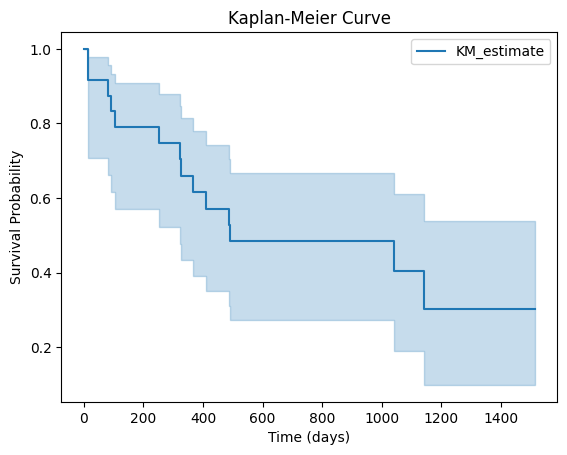

In [95]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
T = modelling_data['T']
E = modelling_data['E']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
ax = kmf.plot_survival_function()
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Probability")
plt.title("Kaplan-Meier Curve")
plt.show()


A Kaplan-Meier curve shows the estimated probability of “survival” or remaining event-free over time for a group of subjects. 

### What the plot shows

- The **horizontal axis** represents time (e.g., months, years).
- The **vertical axis** shows the estimated probability of survival or event-free status — starting at 1 (100%) at time zero and decreasing over time.


### How to interpret the curve

- Each **downward step** occurs when an event (e.g., death, relapse) happens, reflecting a drop in survival probability.
- **Horizontal plateaus** indicate periods with no events, where survival is stable.
- The **steepness** of the slope matters: a steeper downward step means a higher event rate (worse survival); a flatter curve means better survival.


### Understanding survival probabilities

- At any time point on the curve, the vertical value is the estimated probability of still surviving beyond that time.
- For example, if at 12 months the curve is at 0.85, it means an estimated 85% of subjects survive at least 12 months, or 15% have experienced the event by then.


### Additional details

- **Censoring** is shown by tick marks on the plot; those subjects were lost or event-free at last follow-up.
- Comparing two or more groups' curves helps to visualize differences in survival between treatments or populations, often supplemented by statistical tests.
- The curve is a step function estimating the survival function over time, useful for medical or reliability studies, among others.

This visualization helps understand how quickly events occur over time and estimate median survival times or probabilities at specific time points.

# Adjusting P-value
Because we test many features (when running many univariable Cox regressions on radiomic features), we should adjust p-values (e.g., Benjamini-Hochberg/FDR) to avoid false positives. As testing many features increases the chance of finding significant results just by chance (false positives). Multiple testing correction helps control this.

In [96]:
import statsmodels.stats.multitest as smm

pvals = results_df['p-value'].values  # your list of p-values
rejected, pvals_corrected, _, _ = smm.multipletests(pvals, alpha=0.05, method='fdr_bh')

# rejected gives True/False for significance at FDR 0.05
# pvals_corrected gives the adjusted p-values


In [97]:
# no significant features after correction
pvals_corrected[pvals_corrected < 0.05]

array([], dtype=float64)